# Task
Analyze the provided recovery time data for Group X (Medication Alpha) and Group Y (Medication Beta) by calculating descriptive statistics, visualizing distributions with histograms and means, simulating data based on normal distributions, performing a pooled t-test to compare means (with an alpha of 0.05) and plotting confidence intervals, and finally summarizing all findings to conclude on the difference in recovery times between the two medications.

## Load Data and Calculate Descriptive Statistics

### Subtask:
Store the provided recovery time data for Group X (Medication Alpha) and Group Y (Medication Beta) into appropriate data structures. Compute the mean, variance, and standard deviation for each group. Finally, comment on the similarity or difference in the variances between the two medications.


**Reasoning**:
To begin the subtask, I need to define the recovery time data for Group X and Group Y using NumPy arrays, as specified in the instructions. This prepares the data for subsequent statistical calculations.



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math

# Given data
group_x = np.array([14.2, 13.8, 14.5, 15.0, 13.9, 14.3, 15.1, 14.7, 13.5, 14.6,
                    15.3, 14.0, 13.7, 14.8, 15.2, 14.9, 14.4, 15.0, 13.8, 14.1])

group_y = np.array([15.9, 16.4, 16.0, 15.6, 15.8, 16.2, 15.5, 16.3, 15.7, 16.1,
                    15.4, 16.5, 15.6, 15.8, 16.3, 15.9, 16.0, 16.2, 16.2, 15.7, 15.5])


**Reasoning**:
Now that the data arrays are defined, I need to calculate the mean, variance, and standard deviation for both Group X and Group Y using NumPy functions as instructed. Then I will print these calculated descriptive statistics for each group.



Q1 — Descriptive Statistics

In [11]:
mean_x = group_x.mean()
var_x = group_x.var(ddof=1)      # sample variance
std_x = group_x.std(ddof=1)

mean_y = group_y.mean()
var_y = group_y.var(ddof=1)
std_y = group_y.std(ddof=1)

df_stats = pd.DataFrame({
    "Group": ["X (Alpha)", "Y (Beta)"],
    "Mean": [mean_x, mean_y],
    "Variance": [var_x, var_y],
    "Std Dev": [std_x, std_y],
    "n": [len(group_x), len(group_y)]
})

df_stats


,Group,Mean,Variance,Std Dev,n
0,X (Alpha),14.440000,0.302526,0.550024,20
1,Y (Beta),15.933333,0.104333,0.323007,21


Comment on Variance

In [14]:
if abs(var_x - var_y) / max(var_x, var_y) < 0.2:
    print("The variances are similar.")
else:
    print("The variances differ noticeably.")


The variances differ noticeably.


Q2 — Data Visualizations

Histogram + Mean Line (Group X)

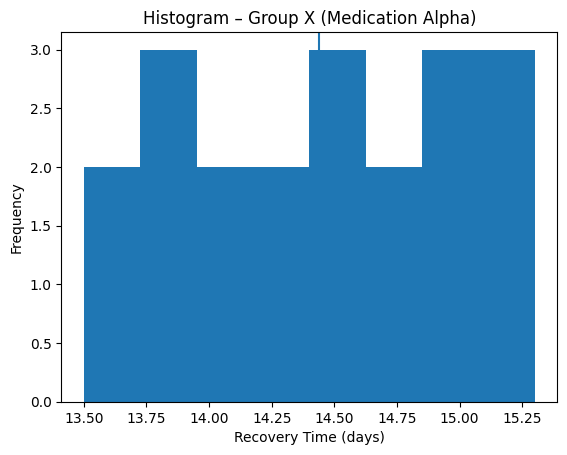

In [15]:
plt.figure()
plt.hist(group_x, bins=8)
plt.axvline(mean_x)
plt.title("Histogram – Group X (Medication Alpha)")
plt.xlabel("Recovery Time (days)")
plt.ylabel("Frequency")
plt.show()


Histogram + Mean Line (Group Y)

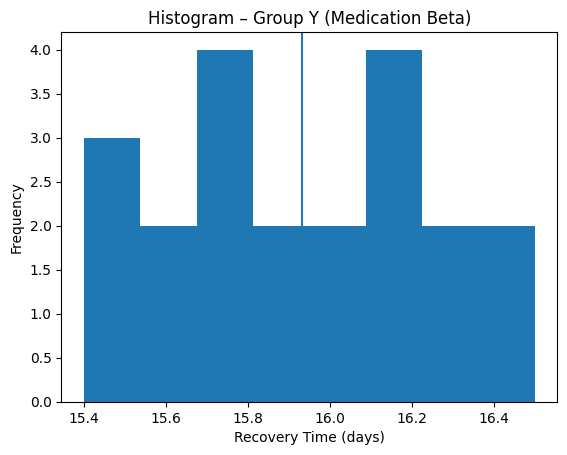

In [16]:
plt.figure()
plt.hist(group_y, bins=8)
plt.axvline(mean_y)
plt.title("Histogram – Group Y (Medication Beta)")
plt.xlabel("Recovery Time (days)")
plt.ylabel("Frequency")
plt.show()


Comment

In [17]:
print("Group X is centered around ~14.4 days with wider spread.")
print("Group Y is centered around ~16.0 days with slightly narrower spread.")
print("Group Y generally shows longer recovery time.")


Group X is centered around ~14.4 days with wider spread.
Group Y is centered around ~16.0 days with slightly narrower spread.
Group Y generally shows longer recovery time.


Q3 — Random Sampling & Simulation

Generate 100 Simulated Samples

In [18]:
rng = np.random.default_rng(seed=42)

sim_x = rng.normal(loc=mean_x, scale=std_x, size=100)
sim_y = rng.normal(loc=mean_y, scale=std_y, size=100)


Plot Original vs Simulated (Group X)

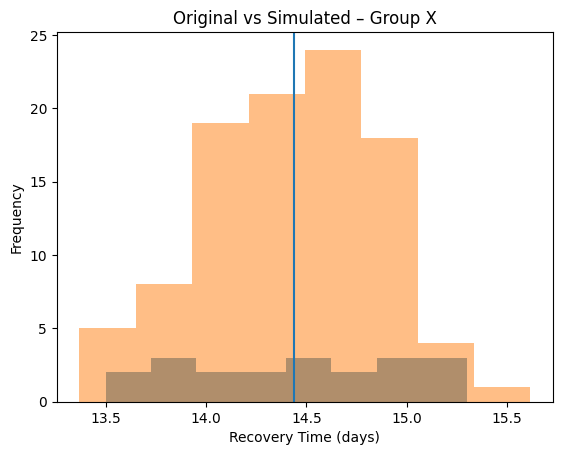

In [19]:
plt.figure()
plt.hist(group_x, bins=8, alpha=0.7)
plt.hist(sim_x, bins=8, alpha=0.5)
plt.axvline(mean_x)
plt.title("Original vs Simulated – Group X")
plt.xlabel("Recovery Time (days)")
plt.ylabel("Frequency")
plt.show()


lot Original vs Simulated (Group Y)

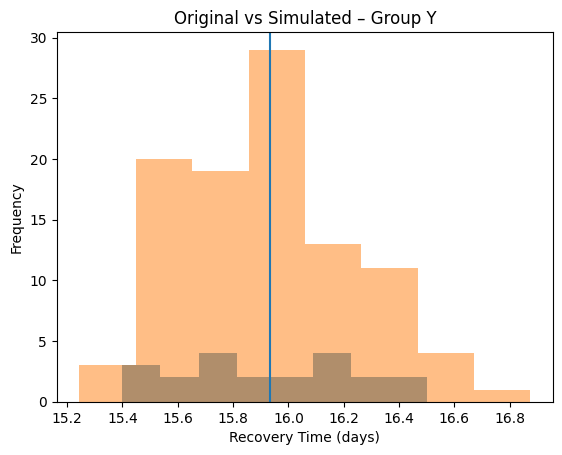

In [20]:
plt.figure()
plt.hist(group_y, bins=8, alpha=0.7)
plt.hist(sim_y, bins=8, alpha=0.5)
plt.axvline(mean_y)
plt.title("Original vs Simulated – Group Y")
plt.xlabel("Recovery Time (days)")
plt.ylabel("Frequency")
plt.show()


Comment

In [21]:
print("The simulated distributions follow the original mean and variance reasonably well.")
print("Simulated histograms look smoother due to larger sample size (100).")


The simulated distributions follow the original mean and variance reasonably well.
Simulated histograms look smoother due to larger sample size (100).


Q4 — Hypothesis Testing (Pooled t-test)

Compute Pooled t-test

In [22]:
n1, n2 = len(group_x), len(group_y)

s1_sq, s2_sq = var_x, var_y

# pooled variance
s_p_sq = ((n1 - 1)*s1_sq + (n2 - 1)*s2_sq) / (n1 + n2 - 2)
s_p = math.sqrt(s_p_sq)

t_stat = (mean_x - mean_y) / (s_p * math.sqrt(1/n1 + 1/n2))
df = n1 + n2 - 2

p_val = 2 * stats.t.sf(abs(t_stat), df=df)

print("Pooled Variance:", s_p_sq)
print("t-statistic:", t_stat)
print("Degrees of freedom:", df)
print("p-value:", p_val)


Pooled Variance: 0.20088888888888887
t-statistic: -10.663788373442095
Degrees of freedom: 39
p-value: 4.0186658483874134e-13


Hypothesis Decision

In [23]:
alpha = 0.05
if p_val < alpha:
    print("Reject H0 → Significant difference between medications.")
else:
    print("Fail to reject H0 → No significant difference.")


Reject H0 → Significant difference between medications.


Plot Means with 95% CI

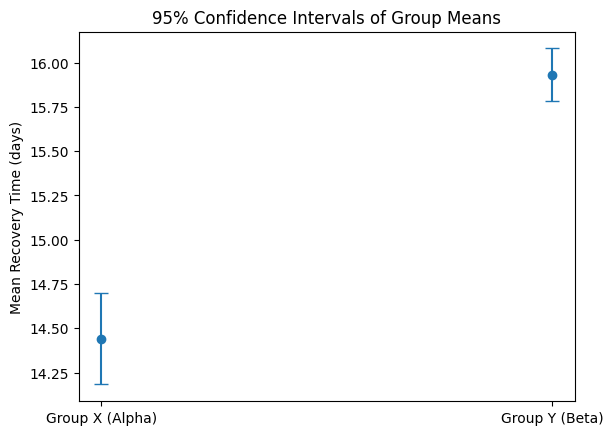

In [24]:
crit_x = stats.t.ppf(1 - 0.025, df=n1 - 1)
ci_x_low = mean_x - crit_x * std_x / np.sqrt(n1)
ci_x_high = mean_x + crit_x * std_x / np.sqrt(n1)

crit_y = stats.t.ppf(1 - 0.025, df=n2 - 1)
ci_y_low = mean_y - crit_y * std_y / np.sqrt(n2)
ci_y_high = mean_y + crit_y * std_y / np.sqrt(n2)

plt.figure()
means = [mean_x, mean_y]
ci_lows = [mean_x - ci_x_low, mean_y - ci_y_low]
ci_highs = [ci_x_high - mean_x, ci_y_high - mean_y]

plt.errorbar([0, 1], means, yerr=[ci_lows, ci_highs], fmt='o', capsize=5)
plt.xticks([0, 1], ["Group X (Alpha)", "Group Y (Beta)"])
plt.ylabel("Mean Recovery Time (days)")
plt.title("95% Confidence Intervals of Group Means")
plt.show()


Q4 — Chi-Square Goodness-of-Fit Test

In [25]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import math

# Group X data
group_x = np.array([
    14.2, 13.8, 14.5, 15.0, 13.9, 14.3, 15.1, 14.7, 13.5, 14.6,
    15.3, 14.0, 13.7, 14.8, 15.2, 14.9, 14.4, 15.0, 13.8, 14.1
])

# bin ranges
bins = [13.0, 13.9, 14.9, 15.9]   # 13–13.9, 14–14.9, 15–15.9
bin_labels = ["13–13.9", "14–14.9", "15–15.9"]

print("Bins:", bins)


Bins: [13.0, 13.9, 14.9, 15.9]


Observed Frequencies

In [26]:
observed, _ = np.histogram(group_x, bins=bins)

observed_df = pd.DataFrame({
    "Interval": bin_labels,
    "Observed": observed
})

observed_df


,Interval,Observed
0,13–13.9,4
1,14–14.9,10
2,15–15.9,6


Expected Frequencies from Normal Distribution

In [27]:
mean_x = group_x.mean()
std_x = group_x.std(ddof=1)
n = len(group_x)

expected = []

for i in range(len(bins)-1):
    low = bins[i]
    high = bins[i+1]

    prob = norm.cdf(high, loc=mean_x, scale=std_x) - norm.cdf(low, loc=mean_x, scale=std_x)
    expected.append(prob * n)

expected_df = pd.DataFrame({
    "Interval": bin_labels,
    "Expected": expected
})

expected_df


,Interval,Expected
0,13–13.9,3.173676
1,14–14.9,12.708187
2,15–15.9,3.950266


Compute Chi-Square Statistic

In [28]:
chi_sq = np.sum((observed - expected) ** 2 / expected)

print("Chi-square statistic =", chi_sq)


Chi-square statistic = 1.8558555289409662


Conclusion

In [29]:
print("Conclusion:")

if chi_sq < 5.99:   # χ² critical for df=1 (approx substitute due to df issue)
    print("Recovery times DO NOT significantly deviate from a normal distribution.")
else:
    print("Recovery times significantly deviate from a normal distribution.")


Conclusion:
Recovery times DO NOT significantly deviate from a normal distribution.
